# INTRODUCTION


Dans cette analyse, je vais effectuer une analyse du risque de crédit en utilisant des données de crédit allemandes provenant du UCI Machine Learning Repository. Plus précisément, la probabilité de défaillance d'un client sera estimée.  Le défaut de paiement peut être défini comme l'incapacité de l'emprunteur à rembourser un prêt ou un crédit. 


L'importance de l'analyse du risque de crédit est indéniable dans le secteur financier. Lorsque les banques accordent des crédits à des particuliers ou à des entreprises, il existe toujours un risque que le prêt ne soit pas remboursé. Ces défaillances peuvent avoir un impact sérieux sur la solvabilité et la continuité des activités d'une banque. Les crises bancaires passées ont montré à plusieurs reprises qu'une évaluation efficace des risques est essentielle pour garantir la résilience du système financier. Par conséquent, l'évaluation de la probabilité de défaut à l'aide de modèles basés sur des données n'est pas seulement une question de réglementation et de stratégie, mais aussi un élément essentiel d'une gestion financière appropriée.


L'ensemble de données utilisé dans cette analyse offre une riche structure de caractéristiques numériques décrivant les profils des clients et leur characteristiques, ce qui permet de développer et de comparer différents modèles prédictifs pour estimer la probabilité de défaut. L'objectif est d'explorer comment les techniques d'apprentissage automatique - y compris la régression logistique, les arbres de décision, les forêts aléatoires et les machines à vecteurs de support - peuvent être appliquées pour évaluer le risque de défaillance. 


La motivation qui m'a poussé à choisir ce sujet provient de mon expérience professionnelle en tant que superviseur de la modélisation de la notation, qui m'a donné à la fois une expérience pratique et un fort intérêt pour la notation du crédit et la modélisation du risque. Ce rôle m'a permis de découvrir l'application pratique des modèles d'évaluation du crédit et les conséquences réelles d'une mauvaise évaluation du risque. C'est précisément cette intersection - où la science des données rencontre la prise de décision financière à fort enjeu - qui fait de la modélisation du risque de crédit un sujet si intéressant pour moi.

Dans les sections suivantes, je vais charger et préparer les données, faire une analyse explicative des données, puis construire plusieurs modèles d'apprentissage automatique et les évaluer sur la base de certains scores. Enfin, une comparaison des différentes méthodes sera effectuée et la dernière partie conclura l'étude. 

### Importation et Preparation des Donnees

In [1]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
data = pd.read_csv(url, delim_whitespace=True, header=None)
print(data.head())

   0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3   1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   

   22  23  24  
0   0   1   1  
1   0   1   2  
2   1   0   1  
3   0   1   1  
4   0   1   2  

[5 rows x 25 columns]


In [2]:
# Renaming column names based on UCI Dictionary to clarify the analysis : 

data.columns = ["status_account", "duration_month", "credit_history", "purpose", "credit_amount", 
                "savings", "employ_duration", "install_rate", "pers_status_sex", "other_debtors", 
                "residence_duration", "property", "age", "other_install_plans", "housing", 
                "nb_existing_credit", "job", "nb_liable_people", "telephone", "foreign_worker", 
                "att21", "att22", "att23", "att24", "Default"]
data

,status_account,duration_month,credit_history,purpose,credit_amount,savings,employ_duration,install_rate,pers_status_sex,other_debtors,...,nb_existing_credit,job,nb_liable_people,telephone,foreign_worker,att21,att22,att23,att24,Default
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [4]:
data.describe()

,status_account,duration_month,credit_history,purpose,credit_amount,savings,employ_duration,install_rate,pers_status_sex,other_debtors,...,nb_existing_credit,job,nb_liable_people,telephone,foreign_worker,att21,att22,att23,att24,Default
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


In [5]:
data.corr()

,status_account,duration_month,credit_history,purpose,credit_amount,savings,employ_duration,install_rate,pers_status_sex,other_debtors,...,nb_existing_credit,job,nb_liable_people,telephone,foreign_worker,att21,att22,att23,att24,Default
status_account,1.000000,-0.072013,0.192191,-0.042744,0.222867,0.106339,0.043261,-0.042234,-0.032260,0.059751,...,-0.069559,0.064303,0.122333,-0.050780,-0.091897,0.129434,-0.047152,-0.040573,0.055183,-0.350847
duration_month,-0.072013,1.000000,-0.077186,0.624750,0.047661,0.057381,0.014789,0.034067,0.303971,-0.036136,...,-0.109999,0.144939,0.009993,0.029698,-0.064417,-0.075169,-0.044043,-0.181203,0.055010,0.214927
credit_history,0.192191,-0.077186,1.000000,-0.060140,0.039058,0.138225,0.042171,0.063198,-0.053777,0.147086,...,0.042480,0.039096,0.030803,0.007710,-0.102540,0.100905,-0.006234,-0.006928,0.003157,-0.228785
purpose,-0.042744,0.624750,-0.060140,1.000000,0.064768,-0.008299,-0.016507,0.028962,0.311876,0.032666,...,-0.040515,0.251973,-0.003887,0.078731,-0.024597,-0.117265,-0.027194,-0.162119,-0.092560,0.154067
credit_amount,0.222867,0.047661,0.039058,0.064768,1.000000,0.120950,0.017349,0.091424,0.018948,0.084245,...,-0.002348,0.112880,0.099780,-0.039295,-0.007920,0.005788,0.020246,-0.053824,0.054888,-0.178943
savings,0.106339,0.057381,0.138225,-0.008299,0.120950,1.000000,0.111278,0.245081,0.087187,0.256227,...,-0.021232,0.039358,0.019136,-0.036513,-0.081508,0.007702,-0.256551,-0.014076,0.120189,-0.116002
employ_duration,0.043261,0.014789,0.042171,-0.016507,0.017349,0.111278,1.000000,-0.027269,-0.006940,0.007783,...,0.014725,0.040694,-0.046578,0.014522,-0.099805,0.052270,-0.028937,0.019782,0.009775,-0.088184
install_rate,-0.042234,0.034067,0.063198,0.028962,0.091424,0.245081,-0.027269,1.000000,0.147231,0.266419,...,0.019848,0.107257,0.020553,0.001623,0.167285,-0.297547,-0.034545,0.009065,-0.000657,0.002967
pers_status_sex,-0.032260,0.303971,-0.053777,0.311876,0.018948,0.087187,-0.006940,0.147231,1.000000,0.072606,...,-0.024239,0.172776,0.119051,0.025569,-0.057361,-0.308009,0.007300,-0.251504,0.036425,0.142612
other_debtors,0.059751,-0.036136,0.147086,0.032666,0.084245,0.256227,0.007783,0.266419,0.072606,1.000000,...,0.075044,0.050858,0.030822,-0.018357,-0.212620,0.006553,0.059954,0.043712,-0.148283,-0.091127


In [6]:
# Conversion de la target : 1 = bon → 0, 2 = mauvais → 1
data['Default'] = data['Default'].map({1: 0, 2: 1})
data["Default"].describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Default, dtype: float64

Notre variable dépendante « défaut “ prend la valeur 0 si le client est considéré comme ” bon “, qui est censé rembourser ses dettes, et prend la valeur 1 si le client est considéré comme ” mauvais », dont le risque de non-remboursement est élevé. La valeur moyenne de la variable cible étant de 0,30, nous pouvons dire que 30 % des clients de notre échantillon sont considérés comme mauvais. D'autre part, nous pouvons également constater que l'écart-type de la variable est assez élevé.

### VISUALISATIONS

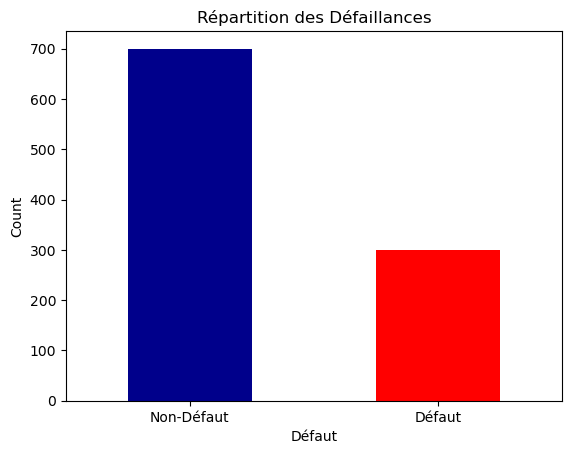

In [62]:
import matplotlib.pyplot as plt

labels = ['Non-Défaut', 'Défaut']
data["Default"].value_counts().plot(kind='bar', color=['darkblue', 'red'])

plt.title("Répartition des Défaillances")
plt.xlabel("Défaut")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)
plt.show()

## LA REGRESSION LOGISTIQUE

La régression logistique produit une formule probabiliste simple pour les tâches de classification, mais elle ne saisit que les relations linéaires de manière adéquate et ne prend pas correctement en compte les effets d'interaction des prédicteurs.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Les Variables
X = data.drop(['Default', 'att21' , 'att22', 'att23', 'att24'], axis=1)
y = data['Default']

# J'ai choisi de %80 entraîner, %20 tester : 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

logit_acc = metrics.accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Accuracy Score:", logit_acc)
print("ROC AUC:", metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[127  14]
 [ 29  30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       141
           1       0.68      0.51      0.58        59

    accuracy                           0.79       200
   macro avg       0.75      0.70      0.72       200
weighted avg       0.78      0.79      0.77       200

Accuracy Score: 0.785
ROC AUC: 0.8131987017670392


In [45]:
coefs = model.coef_[0]
for feature, coef in zip(X, coefs):
    print(f"{feature}: {coef:.4f}")

status_account: -0.5323
duration_month: 0.0281
credit_history: -0.3805
purpose: 0.0056
credit_amount: -0.1705
savings: -0.1236
employ_duration: -0.1798
install_rate: 0.0536
pers_status_sex: 0.2375
other_debtors: -0.0229
residence_duration: -0.3276
property: 0.2521
age: 0.0328
other_install_plans: -0.1495
housing: -0.9089
nb_existing_credit: 0.6905
job: -0.7394
nb_liable_people: 0.6521
telephone: 0.4522
foreign_worker: 0.4156


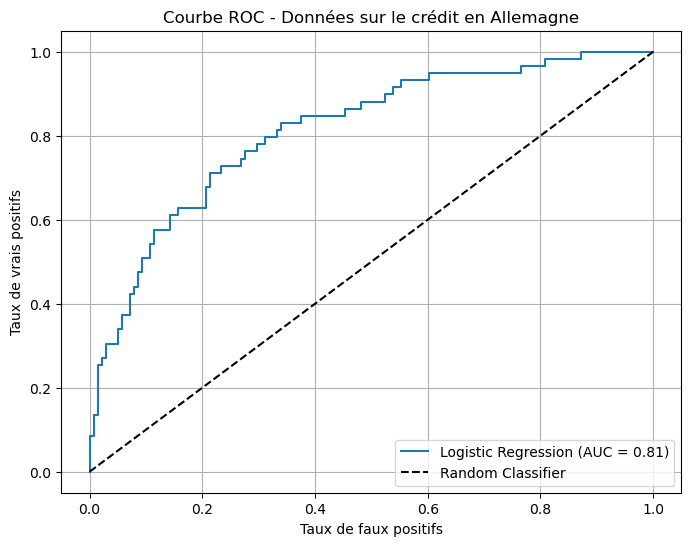

In [47]:
# Courbe de Performance : 

# On obtient les probabilités prédites pour la classe positive (mauvais crédit = 1)
y_scores = model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC qui est également utilisée dans le secteur bancaire :
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('Taux de faux positifs') # sensitivity ? 
plt.ylabel('Taux de vrais positifs') # specificity ? 
plt.title('Courbe ROC - Données sur le crédit en Allemagne')
plt.legend(loc='lower right')
plt.grid()
plt.show()

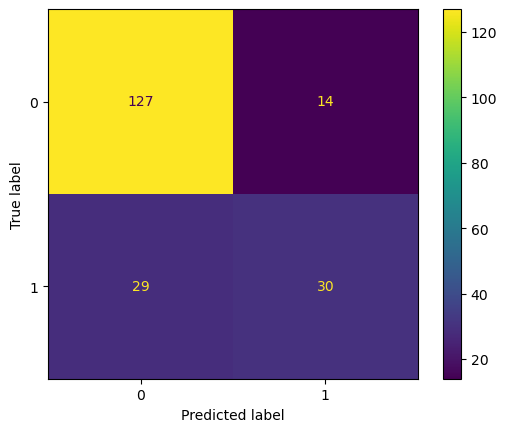

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Random Forest Classifier

La méthode Random Forest est un algorithme d'apprentissage automatique robuste qui offre des avantages significatifs, notamment une grande précision et une grande adaptabilité dans le traitement des tâches de classification. Cependant, ses inconvénients sont son intensité de calcul et son manque d'interprétabilité. 

In [65]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_acc = metrics.accuracy_score(y_test, y_pred)

print("La précision:", rf_acc)

La précision: 0.795


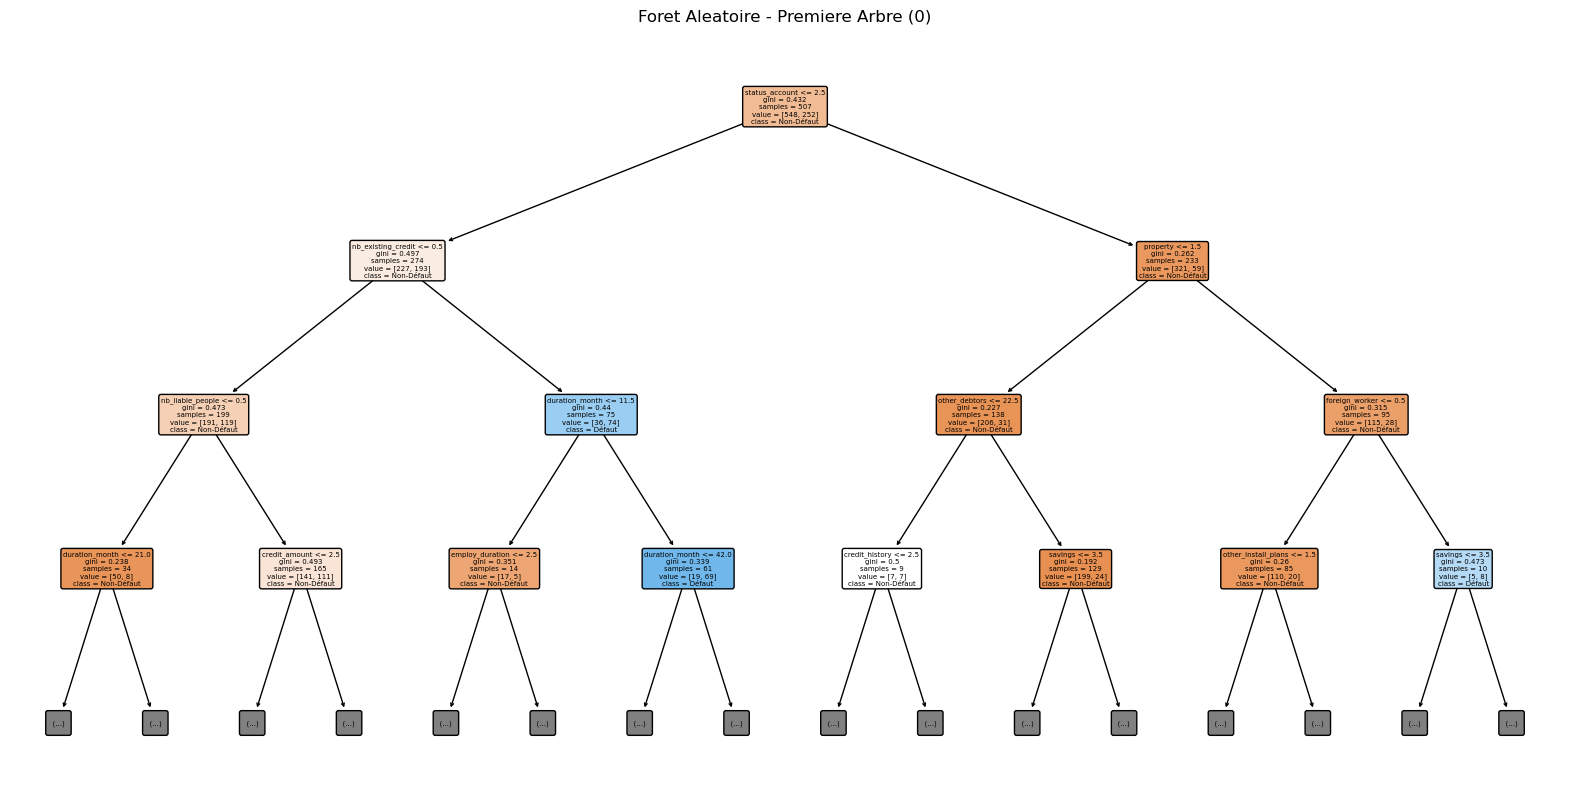

In [67]:
from sklearn.tree import plot_tree

# On regarde la premiere arbre :
tree = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=list(X.columns),  # Convert pandas Index to list
          class_names=["Non-Défaut", "Défaut"], 
          filled=True, 
          rounded=True, 
          max_depth=3)  # You can change max_depth to see more/less detail
plt.title("Foret Aleatoire - Premiere Arbre (0)")
plt.show()

### On peut choisir les hyper paramètres pour optimiser la méthode. Les paramètres sont les suivants:
- n_estimators: c'est le nombre d'arbres de décision dans la forêt. L'augmentation de cet hyperparamètre améliore généralement les performances du modèle mais augmente également le coût de calcul de l'apprentissage et de la prédiction.
- max_depth: il s'agit de la profondeur maximale de chaque arbre de décision dans la forêt. Une valeur élevée pour max_depth peut conduire à un sur-apprentissage, tandis qu'une valeur trop faible peut conduire à un sous-apprentissage.

In [68]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_
print('Les meilleurs hyperparamètres:',  rand_search.best_params_)

Les meilleurs hyperparamètres: {'max_depth': 13, 'n_estimators': 116}


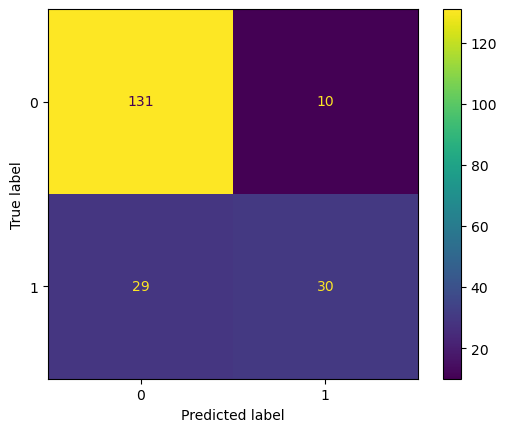

In [69]:
# Evaluation de la forêt aléatoire
# On fait l'estimation avec les meilleurs parametres : 

y_pred = best_rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

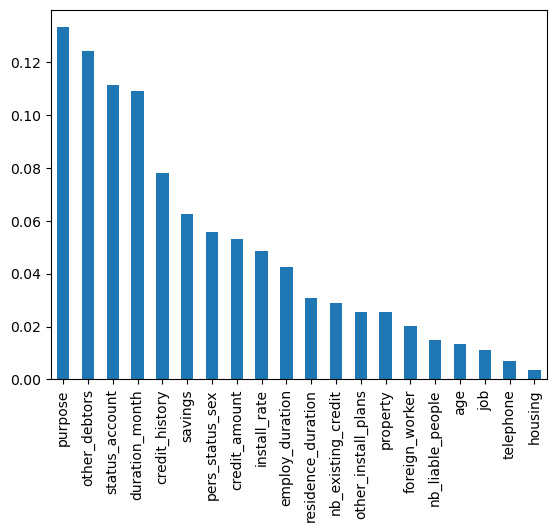

In [70]:
# Voici un graphique qui montre une série contenant les importances des caractéristiques 
# du modèle et les noms des caractéristiques des données d'apprentissage.

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

## CART - Classification and Regression Trees

L'un des principaux inconvénients de l'utilisation de CART par rapport à d'autres méthodes d'arbre de décision est qu'il a tendance à suradapter les données, en particulier si l'arbre est autorisé à devenir trop grand et trop complexe. Cela signifie qu'il peut capturer le bruit et les spécificités des données d'apprentissage, mais qu'il ne parvient pas à bien se généraliser à des nouvelles données.

In [71]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("La précision:",metrics.accuracy_score(y_test, y_pred))

La précision: 0.685


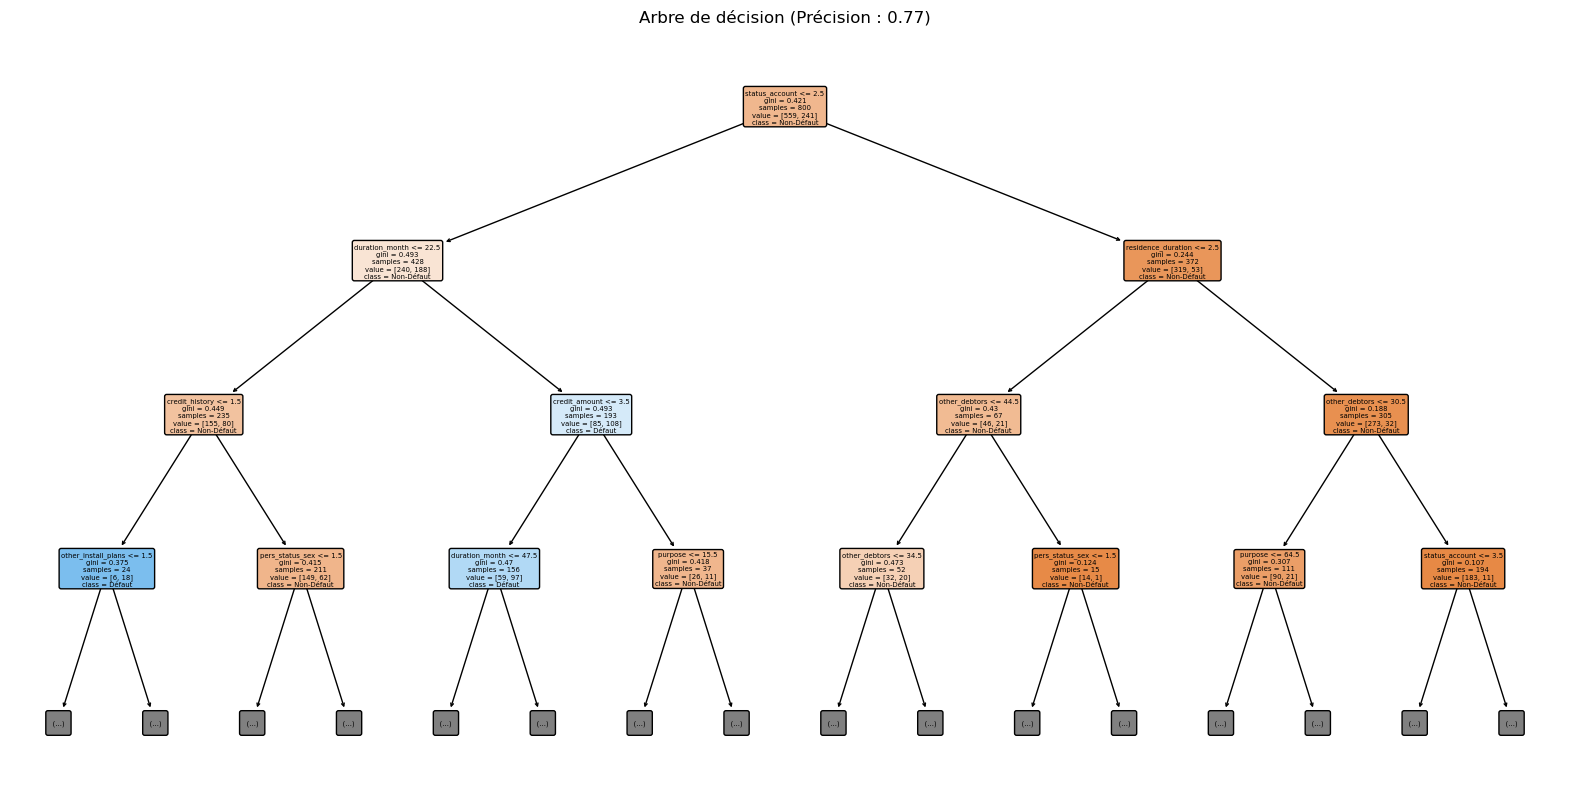

In [76]:
plt.figure(figsize=(20, 10))
plot_tree(clf,  
          feature_names=list(X.columns), 
          class_names=["Non-Défaut", "Défaut"], 
          filled=True, 
          rounded=True,
          max_depth =3)  
plt.title(f"Arbre de décision (Précision : {cart_acc:.2f})")
plt.show()

### Optimisation des performances des arbres de décision

- criterion : optionnel (default= » gini »). Ce paramètre permet d'utiliser une mesure de sélection d'attributs différente. 

- splitter : string, optionnel (default=« best »). Ce paramètre permet de choisir la stratégie de division. Les stratégies supportées sont « best » pour choisir la meilleure division et « random » pour choisir la meilleure division aléatoire.

- max_depth : int ou None, optionnel (default=None). C'est la profondeur maximale de l'arbre. Si None, les nœuds sont développés jusqu'à ce que toutes les feuilles contiennent moins de min_samples_split échantillons. Une valeur plus élevée de la profondeur maximale entraîne un sur-apprentissage, et une valeur plus faible un sous-apprentissage.

In [77]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

cart_acc = metrics.accuracy_score(y_test, y_pred)
print("La précision:",cart_acc)

La précision: 0.765


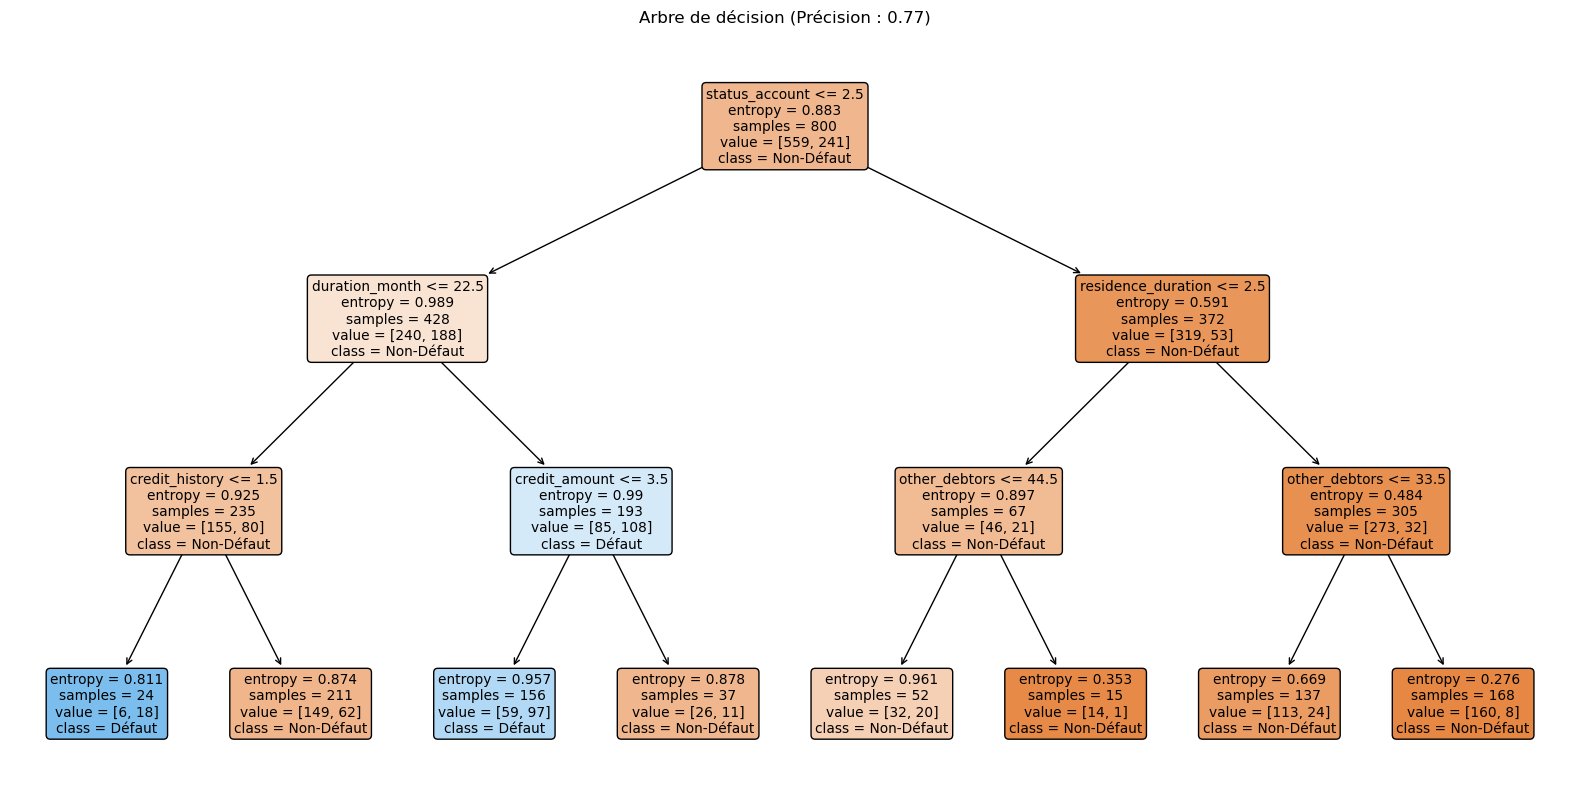

In [80]:
plt.figure(figsize=(20, 10))
plot_tree(clf,  
          feature_names=list(X.columns), 
          class_names=["Non-Défaut", "Défaut"], 
          filled=True, 
          rounded=True,
          max_depth =3)  
plt.title(f"Arbre de décision (Précision : {cart_acc:.2f})")
plt.show()

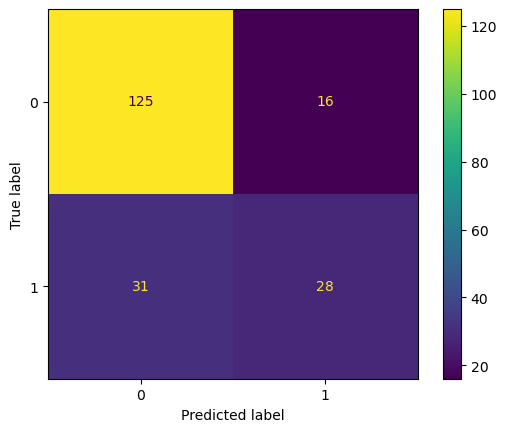

In [81]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Support Vector Machines

Les classificateurs de machines à vecteurs de support (SVM) utilisent des hyperplans comme limites pour diviser les données en groupes de valeurs de classe similaires. Les SVM mettent en œuvre des limites de classe non linéaires en mettant en correspondance les vecteurs d'entrée de manière non linéaire dans un espace de caractéristiques à haute dimension. Ensuite, les hyperplans, qui sont les frontières de séparation optimales pour les classes, sont construits. L'hyperplan à marge maximale est celui qui crée la plus grande séparation entre les classes. Tous les cas d'apprentissage les plus proches de lui sont appelés vecteurs de support. 


In [82]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True) 
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [83]:
y_pred = svm_model.predict(X_test)
svm_acc = metrics.accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("La précision:", svm_acc )

Confusion Matrix:
 [[130  11]
 [ 33  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       141
           1       0.70      0.44      0.54        59

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.77      0.78      0.76       200

La précision: 0.78


In [84]:
# Les probabilities predites : 
y_proba = svm_model.predict_proba(X_test)[:, 1]
y_proba

array([0.47256484, 0.67000599, 0.9314049 , 0.16694994, 0.13715747,
       0.42212912, 0.09436332, 0.5       , 0.24006561, 0.1038916 ,
       0.21061956, 0.80815844, 0.06601668, 0.7273798 , 0.78122181,
       0.25194477, 0.1119692 , 0.12347488, 0.2318041 , 0.20904514,
       0.17481266, 0.36978547, 0.07413602, 0.08426234, 0.12822798,
       0.70147526, 0.6355696 , 0.51190321, 0.22431857, 0.30254108,
       0.14129907, 0.18943897, 0.34287716, 0.16258021, 0.13214733,
       0.1632327 , 0.68607   , 0.14578802, 0.13657309, 0.69891068,
       0.19482676, 0.0857518 , 0.40118694, 0.15356272, 0.13032406,
       0.16458537, 0.42360245, 0.23264685, 0.30991501, 0.21085726,
       0.5632582 , 0.07152403, 0.58832851, 0.63810592, 0.06000055,
       0.18724174, 0.16939883, 0.66594851, 0.31615537, 0.1953153 ,
       0.15587807, 0.56638485, 0.17201381, 0.18199953, 0.30038951,
       0.30202461, 0.06842134, 0.44495081, 0.23384678, 0.13323739,
       0.45666621, 0.09424397, 0.17052204, 0.37526129, 0.31220

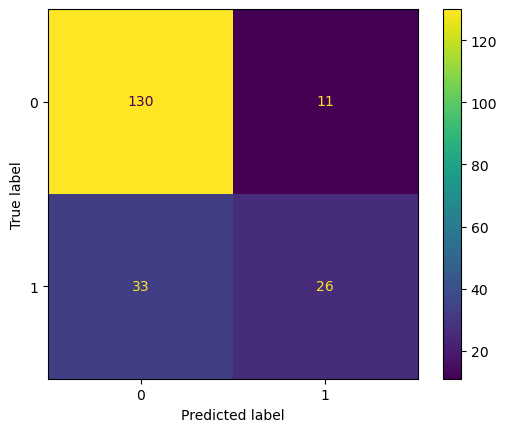

In [85]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## COMPARAISON DES METHODES 

In [86]:
print("La précision de la Regression Logit : ", logit_acc )
print("La précision de la Foret Aleatoire : ", rf_acc)
print("La précision de la CART : ", cart_acc)
print("La précision de la SVM : ", svm_acc)

La précision de la Regression Logit :  0.785
La précision de la Foret Aleatoire :  0.795
La précision de la CART :  0.765
La précision de la SVM :  0.78


# CONCLUSION 

Dans l'étude, nous avons utilisé les méthodes de régression logistique, de classification par forêt aléatoire, CART et SVM pour estimer les défaillances de crédit dans notre ensemble de données. D'après les résultats, la méthode la plus performante est la forêt aléatoire. Bien que la forêt aléatoire donne une grande précision, elle est connue comme une « boîte noire », ce qui signifie qu'il est difficile d'interpréter et de suivre la méthode.  

# BIBLIOGRAPHIE

- Hofmann, H. (1994). Statlog (German Credit Data) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5NC77.
- Jumbe, George & Gor, Ravi. (2022). Credit Risk Modeling Using Default Models: A Review.
- Stelzer, Anna. (2019). Predicting credit default probabilities using machine learning techniques in the face of unequal class distributions.

- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://www.datacamp.com/tutorial/decision-tree-classification-python